This notebook recounts the first successful planet injection recovery

In [1]:
%matplotlib inline
import os, sys
sys.path.append("/k2_data/swarced/")
import swarced as sw
import remove_EB as remEB
import matplotlib.pyplot as pl
import numpy as np
from astropy.io import fits, ascii

Set these parameters with te known values

In [2]:
path = "/home/mhughes/Desktop/newEB2/output/"
epicID, campaign, inpath, outpath = "202083510", "0", path, path
period =3.3075922
center = 56729.917585+2400000.
pwid, swid, sep =  0.0190,0.0182,0.4999

Open the file for manipulation and clipping

In [6]:
fn = "ktwo" + epicID + "-c0" + campaign + "_lpd-lc.fits"
f = fits.open(path + fn, mode='update')

In [7]:
phase = remEB.find_phase(f[1].data['time']+f[1].header['BJDREFI'], period, center )
mask = remEB.clip_eclipses(phase, period, sep, pwid, swid)
mask = mask * ((f[1].data['time'] +f[1].header['BJDREFI'])> 2.45672e6 + 50)
f[1].data['quality'][np.logical_not(mask)]= 16384

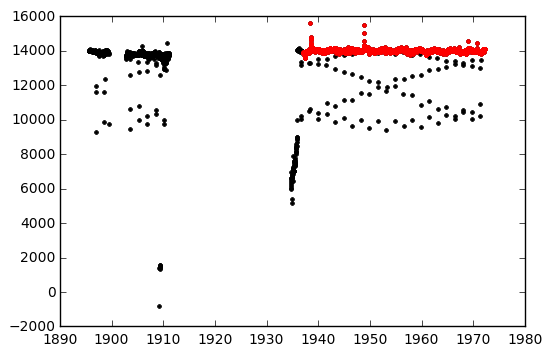

In [8]:
pl.plot(f[1].data['time'],f[1].data['flux'][:,9],'k.')
pl.plot(f[1].data['time'][f[1].data['quality']==0],f[1].data['flux'][:,9][f[1].data['quality']==0],'r.')

In the abover figure, red is parts that were kept from the lightcurve while black was removed.

In [9]:
f.flush()
f.close()

Load in the transit times for comparison on the lightcurve

In [11]:
ttimes = ascii.read("/home/mhughes/Desktop/newEB2/parameters/times_ktwo202083510-c00_lpd-lc.txt")

In [12]:
ttimes['Transit times'] + f[1].header['BJDREFI']

2456731.4
2456739.2
2456747.0
2456754.8
2456762.6
2456770.4
2456778.2
2456786.0
2456793.8
2456801.6


1587 1587 1587


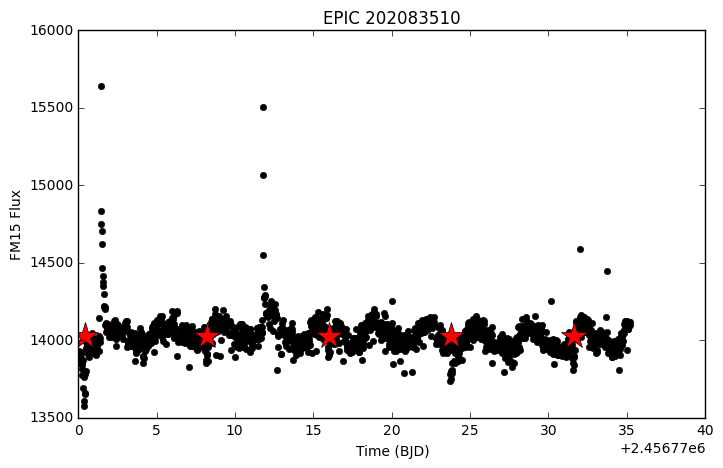

In [26]:
sw.plot_lc("202083510","0",inpath=path, mark_list = (ttimes['Transit times'] +f[1].header['BJDREFI'])[-5:])

Above is the clipped lightcurve with an injected planet. Red stars denote where the injected planet should be. 

3753 1587 1587


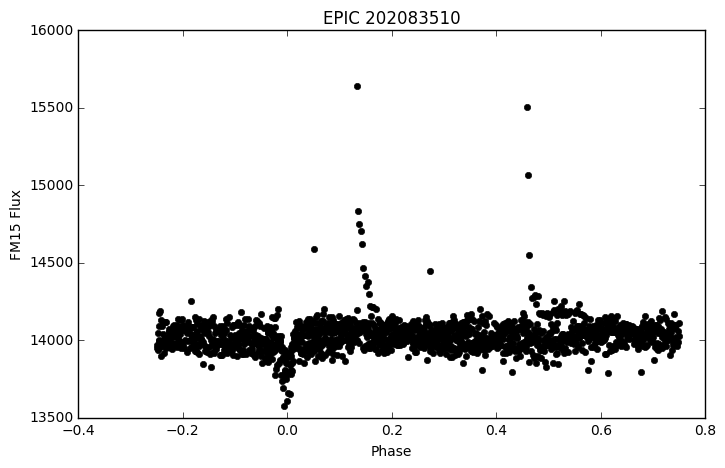

In [15]:
sw.plot_phase("202083510","0",7.8,1937.4+ f[1].header['BJDREFI'],inpath=path)

Here is that same light curve phase folded on the planet's period to convince myself that it's there

Now run ketu!

For sake of curiosity, I ran ketu on an uncleaned lightcurve first (so the EB is included)

In [ ]:
query = sw.get_query(epicID, campaign, inpath)

In [17]:
query['light_curve_file'] = path + fn
query['durations'] = [0.05,0.1,0.2]
query['time_spacing']=0.02

In [18]:
query

{'basis_file': '/k2_data/elcs/c0.h5',
 'catalog_file': '/k2_data/catalogs/epic.h5',
 'durations': [0.05, 0.1, 0.2],
 'initial_time': 1940.0,
 'light_curve_file': '/home/mhughes/Desktop/newEB2/output/ktwo202083510-c00_lpd-lc.fits',
 'max_period': 70.0,
 'min_period': 0.5,
 'nbasis': 150,
 'time_spacing': 0.02}

In [19]:
result = sw.analyze(query)

Querying Data
Finished querying Data in 0.71s
Querying Likelihood
tau = 0.973419189453
163 190
181 163
182 181
182 182
tau = 0.973419189453
tau = 2.10992431641
342 411
350 342
369 350
368 369
368 368
tau = 2.10992431641
tau = 1.41680908203
1564 1798
1630 1564
1671 1630
1666 1671
1665 1666
1662 1665
1661 1662
1662 1661
1662 1662
tau = 1.36074829102
Finished querying Likelihood in 6.85s
Querying OneDSearch
Finished querying OneDSearch in 87.70s
Querying TwoDSearch
Finished querying TwoDSearch in 114.61s


Querying PeakDetect
Finished querying PeakDetect in 1.24s


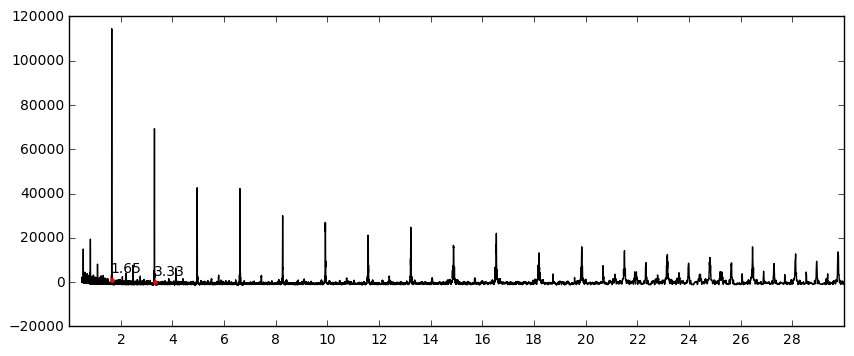

In [21]:
sw.plot_periodogram(result)

It recovered the EB (well half the EB)

Then I actually clipped the data

In [22]:
def clean(filepath):
    f = fits.open(filepath, 'update')
    m = (f[1].data['quality'] == 0 )
    f[1].data = f[1].data[m]
    f.flush()
    f.close()

In [23]:
clean(path + fn)

In [27]:
result_cleaned = sw.analyze(query)

Querying Data
Finished querying Data in 0.47s
Querying Likelihood
tau = 0.861297607422
1569 1587
1569 1569
tau = 0.851104736328
Finished querying Likelihood in 2.10s
Querying OneDSearch
Finished querying OneDSearch in 64.63s
Querying TwoDSearch
Finished querying TwoDSearch in 25.91s


Querying PeakDetect
Finished querying PeakDetect in 1.14s


In [65]:
reload(sw)

<module 'swarced' from '/k2_data/swarced/swarced.py'>

In [60]:
int(result_cleaned.parent_response.parent_response.parent_response.parent_response.response['epic']['epic_number'])

202083510

And we recovered the planet! This was the actual injected period

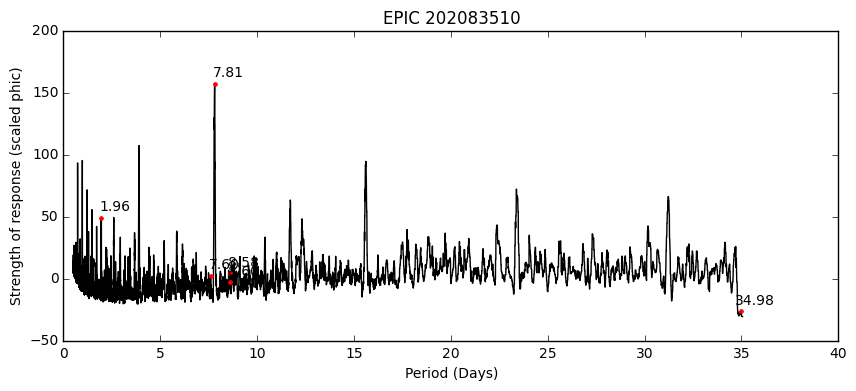

In [66]:
sw.plot_periodogram(result_cleaned)

In [42]:
result_cleaned.response['peaks']

[{'curve_phic': -556389.7934209212,
  'delta_phic': 20.779250978695188,
  'depth': 9.9148351233952869,
  'depth_ivar': 3.7734792149554783,
  'depth_s2n': 19.260008642732942,
  'duration': 0.20000000000000001,
  'period': 7.8070546552744018,
  'phic_norm': 157.0141515973578,
  'phic_same': -373.83552490576199,
  'phic_variable': -2604.6136845655301,
  'rms': 7.8873201123101797,
  't0': 5.1875478193369018},
 {'curve_phic': -37126675.792410918,
  'delta_phic': 18.176201679747351,
  'depth': 5.0461299284629009,
  'depth_ivar': 6.0199414497690631,
  'depth_s2n': 12.380966892174714,
  'duration': 0.050000000000000003,
  'period': 1.9620243512411515,
  'phic_norm': 48.806593636747948,
  'phic_same': -490.86949595990131,
  'phic_variable': -9406.7797809082858,
  'rms': 7.8873201123101797,
  't0': 0.1425175153036522},
 {'curve_phic': -97739.888155062785,
  'delta_phic': 15.400716727720237,
  'depth': 7.3117112510030982,
  'depth_ivar': 1.286176435447127,
  'depth_s2n': 8.2921911808922708,
  'du